In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
spiked_2019 = pd.read_pickle("../output/spikes/2019/spiked_nodes.pkl")
spiked_nodes_2019 = pd.DataFrame(spiked_2019, columns=["spiked_nodes"])
spiked_2023 = pd.read_pickle("../output/spikes/2023/spiked_nodes.pkl")
spiked_nodes_2023 = pd.DataFrame(spiked_2023, columns=["spiked_nodes"])

eigs_sept2019 = pd.read_csv("../output/random_walks/not_uniform_prob/2019-09_sept11_~uniform.csv")
eigs_sept2023 = pd.read_csv("../output/random_walks/not_uniform_prob/2023-09_sept11_~uniform.csv")


In [61]:
print(len(spiked_nodes_2019))
print(len(spiked_nodes_2023))

32
195


In [69]:
eigs_2023_sorted = eigs_sept2023.sort_values(by="eig_cent", ascending=False)
eigs_2023_sorted["rank"] = range(1, len(eigs_2023_sorted) + 1)
eigs_2023_sorted

,Unnamed: 0,page,eig_cent,rank
17524,17524,Wikipedia,0.000004,1
119649,119649,Philosophy,0.000004,2
155902,155902,Outline_of_academic_disciplines,0.000004,3
119506,119506,2023,0.000004,4
270599,270599,WWE_Hall_of_Fame,0.000004,5
...,...,...,...,...
44604,44604,South_Tower,0.000004,276296
169766,169766,WTC,0.000004,276297
259924,259924,AA11,0.000004,276298
220187,220187,911,0.000004,276299


In [70]:
spikes_eigs_2023 = pd.merge(spiked_nodes_2023, eigs_2023_sorted, left_on="spiked_nodes", right_on="page", how="inner")
spikes_eigs_2023

,spiked_nodes,Unnamed: 0,page,eig_cent,rank
0,World_Trade_Center_(2001–present),31140,World_Trade_Center_(2001–present),0.000004,276272
1,World_Trade_Center_station_(PATH),118732,World_Trade_Center_station_(PATH),0.000004,275743
2,Port_Authority_of_New_York_and_New_Jersey_Poli...,31403,Port_Authority_of_New_York_and_New_Jersey_Poli...,0.000004,275941
3,Media_documentation_of_the_September_11_attacks,2511,Media_documentation_of_the_September_11_attacks,0.000004,276249
4,Omar_al-Bayoumi,246586,Omar_al-Bayoumi,0.000004,275278
...,...,...,...,...,...
190,2004_Osama_bin_Laden_video,223577,2004_Osama_bin_Laden_video,0.000004,276242
191,List_of_attacks_on_U.S._territory,39155,List_of_attacks_on_U.S._territory,0.000004,276238
192,National_September_11_Memorial_&_Museum,270298,National_September_11_Memorial_&_Museum,0.000004,276236
193,World_Trade_Center_(1973–2001),127817,World_Trade_Center_(1973–2001),0.000004,276113


<Axes: xlabel='rank', ylabel='eig_cent'>

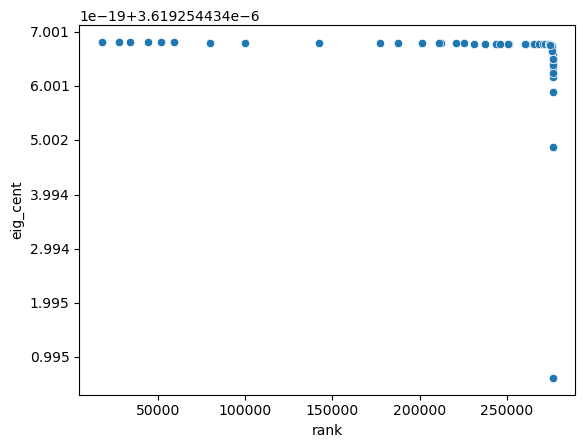

In [75]:
sns.scatterplot(spikes_eigs_2023, x="rank", y="eig_cent")